In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay)
from sklearn.preprocessing import label_binarize


In [ ]:
GITHUB_CSV_URL = "https://raw.githubusercontent.com/DhruvR-HWUD/DMML-Dubai-UG-Group-2/refs/heads/Razin-Branch/Datasets/processed/tabular_data/brain_tumor_dataset.csv"
TARGET_COL = "Histology"
USE_MULTINOMIAL = False

In [ ]:
df = pd.read_csv(GITHUB_CSV_URL)
if TARGET_COL is None: TARGET_COL = df.columns[-1]
X, y = df.drop(columns=[TARGET_COL]), df[TARGET_COL]
X = pd.get_dummies(X, drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
clf = (GaussianNB() if not USE_MULTINOMIAL else MultinomialNB())
clf.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print(classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.2497

                 precision    recall  f1-score   support

    Astrocytoma       0.23      0.27      0.25       987
   Glioblastoma       0.27      0.29      0.28      1014
Medulloblastoma       0.24      0.21      0.23       996
     Meningioma       0.27      0.23      0.24      1003

       accuracy                           0.25      4000
      macro avg       0.25      0.25      0.25      4000
   weighted avg       0.25      0.25      0.25      4000

Confusion Matrix:
 [[265 290 230 202]
 [314 297 186 217]
 [313 269 211 203]
 [273 264 240 226]]


<Figure size 500x400 with 0 Axes>

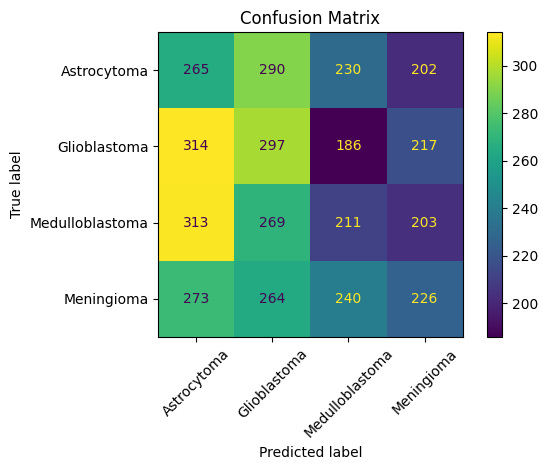

In [ ]:
# 1) Confusion Matrix
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

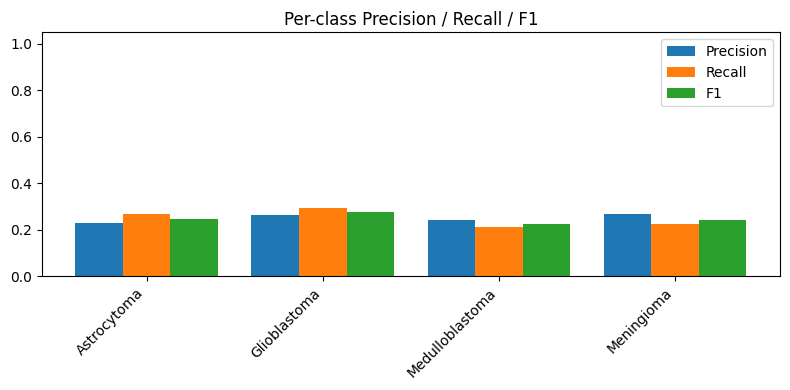

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
classes = [k for k in report.keys() if k not in ("accuracy", "macro avg", "weighted avg")]
precisions = [report[c]["precision"] for c in classes]
recalls    = [report[c]["recall"]    for c in classes]
f1s        = [report[c]["f1-score"]  for c in classes]

x = np.arange(len(classes)); w = 0.27
plt.figure(figsize=(8,4))
plt.bar(x - w, precisions, width=w, label="Precision")
plt.bar(x,     recalls,   width=w, label="Recall")
plt.bar(x + w, f1s,       width=w, label="F1")
plt.xticks(x, classes, rotation=45, ha="right")
plt.ylim(0, 1.05)
plt.title("Per-class Precision / Recall / F1")
plt.legend()
plt.tight_layout()
plt.show()



<Figure size 500x400 with 0 Axes>

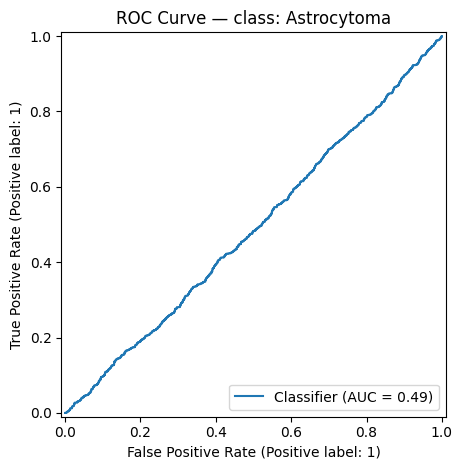

<Figure size 500x400 with 0 Axes>

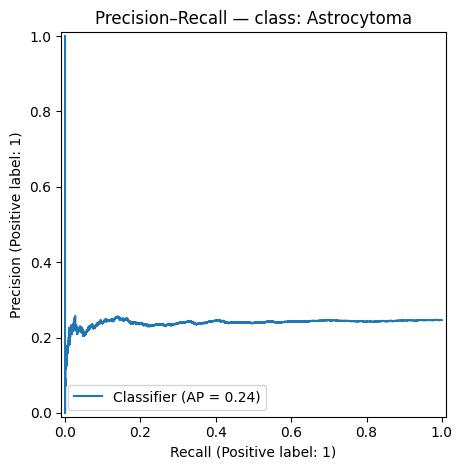

<Figure size 500x400 with 0 Axes>

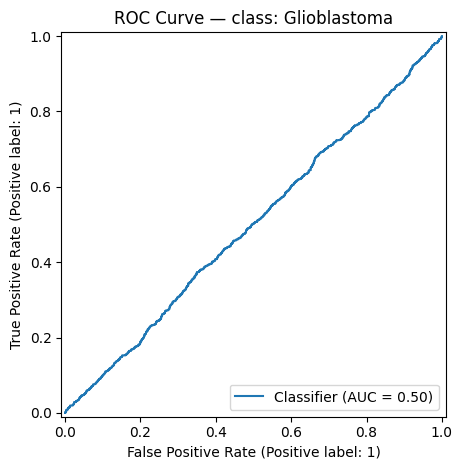

<Figure size 500x400 with 0 Axes>

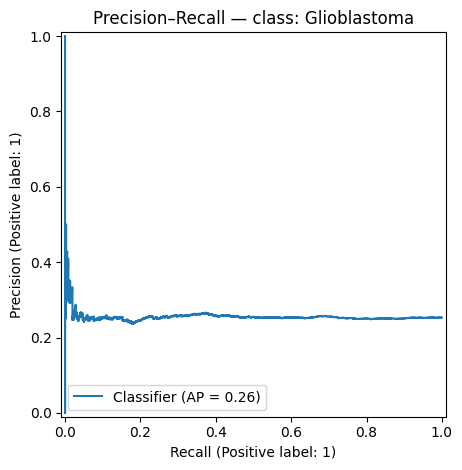

<Figure size 500x400 with 0 Axes>

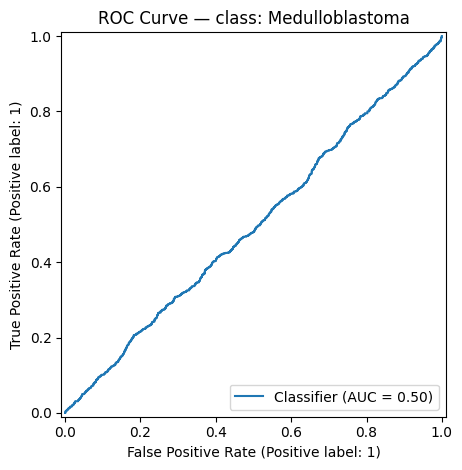

<Figure size 500x400 with 0 Axes>

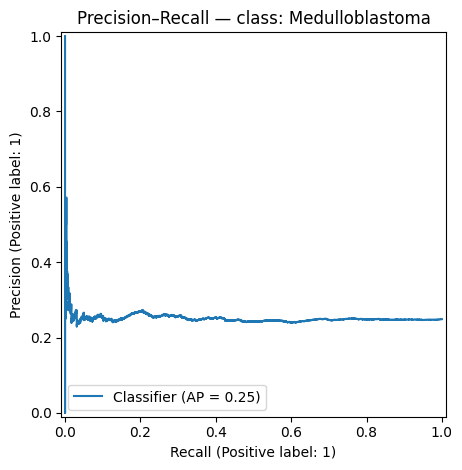

<Figure size 500x400 with 0 Axes>

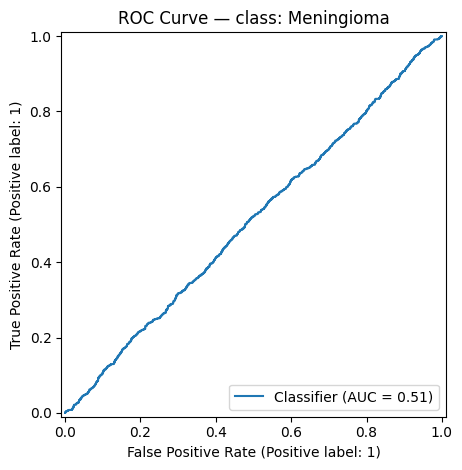

<Figure size 500x400 with 0 Axes>

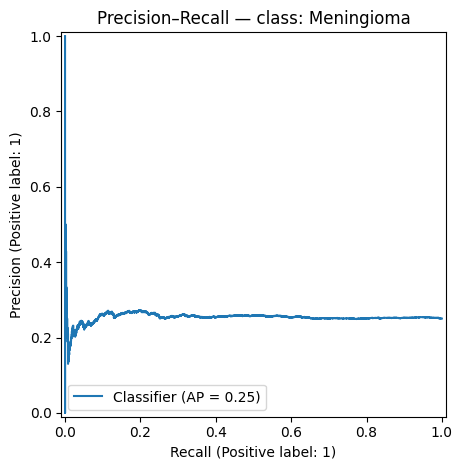

In [ ]:
# 3) ROC & Precision–Recall (if probabilities available)
if hasattr(clf, "predict_proba"):
    y_score = clf.predict_proba(X_test)
    classes_unique = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes_unique)

    # Binary special-case
    if y_test_bin.shape[1] == 1 and len(classes_unique) == 2:
        y_true_bin = y_test_bin.ravel()
        y_scores_bin = y_score[:, 1] if y_score.shape[1] > 1 else y_score.ravel()

        plt.figure(figsize=(5,4))
        RocCurveDisplay.from_predictions(y_true_bin, y_scores_bin)
        plt.title(f"ROC Curve ({classes_unique[1]} vs {classes_unique[0]})")
        plt.tight_layout(); plt.show()

        plt.figure(figsize=(5,4))
        PrecisionRecallDisplay.from_predictions(y_true_bin, y_scores_bin)
        plt.title(f"Precision–Recall ({classes_unique[1]} vs {classes_unique[0]})")
        plt.tight_layout(); plt.show()
    else:
        # One-vs-rest for multiclass
        for i, cls in enumerate(classes_unique):
            plt.figure(figsize=(5,4))
            RocCurveDisplay.from_predictions(y_test_bin[:, i], y_score[:, i])
            plt.title(f"ROC Curve — class: {cls}")
            plt.tight_layout(); plt.show()

            plt.figure(figsize=(5,4))
            PrecisionRecallDisplay.from_predictions(y_test_bin[:, i], y_score[:, i])
            plt.title(f"Precision–Recall — class: {cls}")
            plt.tight_layout(); plt.show()
else:
    print("Model has no predict_proba; skipping ROC/PR plots.")